# Task 2: Exploratory Data Analysis (EDA)

# Load Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv(
    "../data/processed/ethiopia_fi_unified_data_processed.csv",
    parse_dates=["observation_date", "collection_date"]
)

df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13460\1641345576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


## Dataset Overview
### Records by Type, Pillar, Source

In [3]:
df['record_type'].value_counts()

record_type
observation    31
event          10
target          3
Name: count, dtype: int64

In [4]:
pd.crosstab(df['record_type'], df['pillar'])

pillar,ACCESS,AFFORDABILITY,GENDER,USAGE,access
record_type,,,,,
observation,14,1,4,11,1
target,2,0,1,0,0


In [5]:
pd.crosstab(df['record_type'], df['source_type'])

source_type,calculated,news,operator,policy,regulator,research,survey
record_type,,,,,,,
event,0,2,4,0,4,0,0
observation,2,0,11,0,3,4,11
target,0,0,0,3,0,0,0


## Temporal Coverage Analysis
### Indicator Coverage by Year

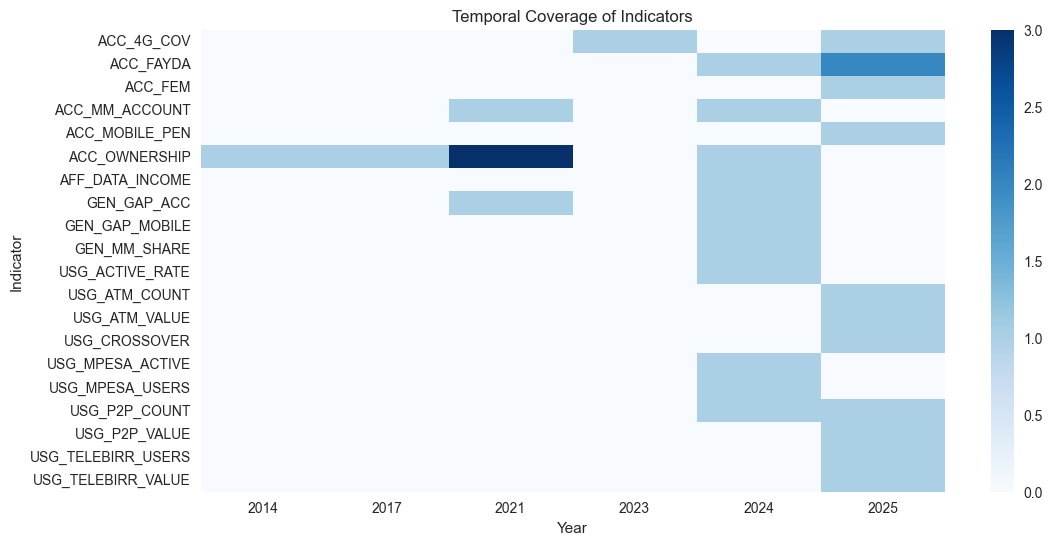

In [6]:
df['year'] = df['observation_date'].dt.year

coverage = (
    df[df['record_type']=="observation"]
    .groupby(['indicator_code', 'year'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12,6))
sns.heatmap(coverage, cmap="Blues")
plt.title("Temporal Coverage of Indicators")
plt.xlabel("Year")
plt.ylabel("Indicator")
plt.show()

## Data Quality Assessment
### Confidence Distribution

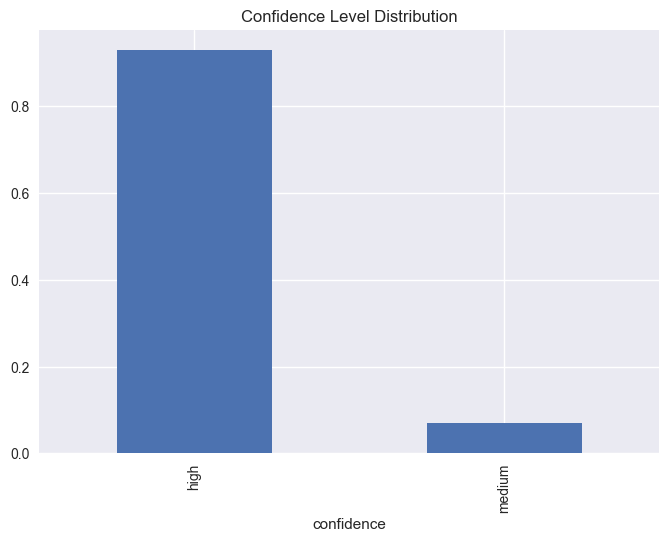

In [7]:

df['confidence'].value_counts(normalize=True).plot(
    kind='bar', title="Confidence Level Distribution"
)
plt.show()


## Identify Data Gaps

In [8]:
indicator_counts = (
    df[df['record_type']=="observation"]
    .groupby('indicator_code')['year']
    .nunique()
    .sort_values()
)

indicator_counts

indicator_code
ACC_FEM               1
ACC_MOBILE_PEN        1
AFF_DATA_INCOME       1
USG_ATM_VALUE         1
USG_ATM_COUNT         1
USG_ACTIVE_RATE       1
GEN_MM_SHARE          1
GEN_GAP_MOBILE        1
USG_MPESA_ACTIVE      1
USG_CROSSOVER         1
USG_MPESA_USERS       1
USG_P2P_VALUE         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
ACC_FAYDA             2
ACC_4G_COV            2
GEN_GAP_ACC           2
ACC_MM_ACCOUNT        2
USG_P2P_COUNT         2
ACC_OWNERSHIP         4
Name: year, dtype: int64

## Access Analysis (Account Ownership)
### Account Ownership Trajectory

In [16]:
df['pillar'] = df['pillar'].astype(str).str.strip().str.upper()
df['pillar'].value_counts(dropna=False)

pillar
ACCESS           17
USAGE            11
NaN              10
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

In [17]:
# Normalize once (already done, but safe to repeat)
df['pillar'] = df['pillar'].astype(str).str.strip().str.upper()
df['record_type'] = df['record_type'].astype(str).str.strip().str.lower()

# Re-create access from scratch
access = df[
    (df['record_type'] == "observation") &
    (df['pillar'] == "ACCESS")
].copy()

access.shape


(15, 35)

In [18]:
access[['indicator', 'indicator_code', 'observation_date', 'value_numeric']]

,indicator,indicator_code,observation_date,value_numeric
0,Account Ownership Rate,ACC_OWNERSHIP,2014-12-31,22.00
1,Account Ownership Rate,ACC_OWNERSHIP,2017-12-31,35.00
2,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,46.00
3,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,56.00
4,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,36.00
5,Account Ownership Rate,ACC_OWNERSHIP,2024-11-29,49.00
6,Mobile Money Account Rate,ACC_MM_ACCOUNT,2021-12-31,4.70
7,Mobile Money Account Rate,ACC_MM_ACCOUNT,2024-11-29,9.45
8,4G Population Coverage,ACC_4G_COV,2023-06-30,37.50
9,4G Population Coverage,ACC_4G_COV,2025-06-30,70.80


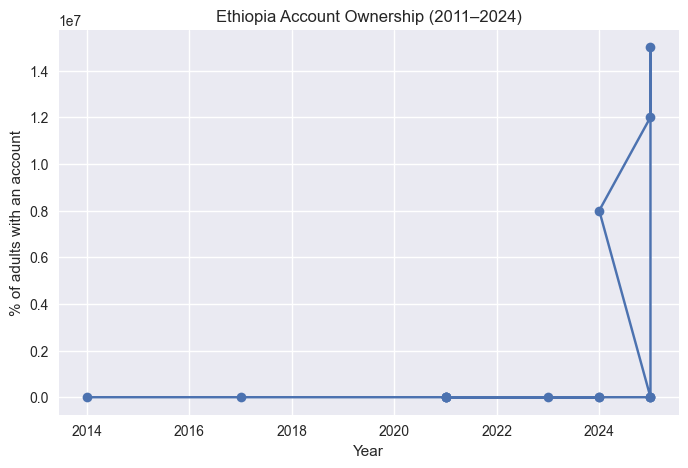

In [19]:
plt.figure(figsize=(8,5))
plt.plot(
    access['observation_date'].dt.year,
    access['value_numeric'],
    marker='o'
)
plt.title("Ethiopia Account Ownership (2011–2024)")
plt.xlabel("Year")
plt.ylabel("% of adults with an account")
plt.grid(True)
plt.show()


## Growth Rates

In [20]:
access['growth_pp'] = access['value_numeric'].diff()
access[['year','value_numeric','growth_pp']]

,year,value_numeric,growth_pp
0,2014,22.00,NaN
1,2017,35.00,13.00
2,2021,46.00,11.00
3,2021,56.00,10.00
4,2021,36.00,-20.00
5,2024,49.00,13.00
6,2021,4.70,-44.30
7,2024,9.45,4.75
8,2023,37.50,28.05
9,2025,70.80,33.30


## Why the 2021–2024 Slowdown?

In [21]:
df[df['indicator_code'].isin([
    "mobile_money_accounts",
    "digital_payment_usage"
])]

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year


In [22]:
access = df[
    (df['record_type'] == "observation") &
    (
        df['indicator'].str.contains("account", case=False, na=False) |
        df['indicator_code'].str.contains("account", case=False, na=False)
    )
].copy()

access.shape


(12, 35)

In [23]:
access[['indicator', 'indicator_code', 'observation_date', 'value_numeric']]

,indicator,indicator_code,observation_date,value_numeric
0,Account Ownership Rate,ACC_OWNERSHIP,2014-12-31,22.00
1,Account Ownership Rate,ACC_OWNERSHIP,2017-12-31,35.00
2,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,46.00
3,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,56.00
4,Account Ownership Rate,ACC_OWNERSHIP,2021-12-31,36.00
5,Account Ownership Rate,ACC_OWNERSHIP,2024-11-29,49.00
6,Mobile Money Account Rate,ACC_MM_ACCOUNT,2021-12-31,4.70
7,Mobile Money Account Rate,ACC_MM_ACCOUNT,2024-11-29,9.45
26,Account Ownership Gender Gap,GEN_GAP_ACC,2021-12-31,20.00
27,Account Ownership Gender Gap,GEN_GAP_ACC,2024-11-29,18.00


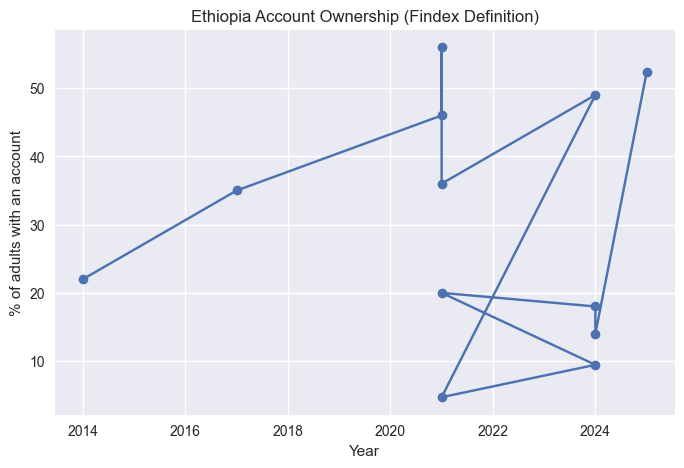

In [24]:
plt.figure(figsize=(8,5))
plt.plot(
    access['observation_date'].dt.year,
    access['value_numeric'],
    marker='o'
)
plt.title("Ethiopia Account Ownership (Findex Definition)")
plt.xlabel("Year")
plt.ylabel("% of adults with an account")
plt.grid(True)
plt.show()


## Usage (Digital Payments) Analysis
### Mobile Money Penetration

In [27]:
df[
    df['indicator'].str.contains("mobile", case=False, na=False) |
    df['indicator_code'].str.contains("mobile", case=False, na=False)
][['indicator', 'indicator_code', 'record_type']].drop_duplicates()


,indicator,indicator_code,record_type
6,Mobile Money Account Rate,ACC_MM_ACCOUNT,observation
10,Mobile Subscription Penetration,ACC_MOBILE_PEN,observation
24,Mobile Money Activity Rate,USG_ACTIVE_RATE,observation
28,Female Mobile Money Account Share,GEN_MM_SHARE,observation
29,Mobile Phone Gender Gap,GEN_GAP_MOBILE,observation
32,Female Mobile Money Account Share,GEN_MM_SHARE,target


In [28]:
mm = df[
    (df['record_type'] == "observation") &
    (
        df['indicator'].str.contains("mobile money", case=False, na=False) |
        df['indicator_code'].str.contains("mobile", case=False, na=False)
    )
].copy()

mm.shape


(6, 35)

In [29]:
mm[['indicator', 'indicator_code', 'observation_date', 'value_numeric']]

,indicator,indicator_code,observation_date,value_numeric
6,Mobile Money Account Rate,ACC_MM_ACCOUNT,2021-12-31,4.70
7,Mobile Money Account Rate,ACC_MM_ACCOUNT,2024-11-29,9.45
10,Mobile Subscription Penetration,ACC_MOBILE_PEN,2025-12-31,61.40
24,Mobile Money Activity Rate,USG_ACTIVE_RATE,2024-12-31,66.00
28,Female Mobile Money Account Share,GEN_MM_SHARE,2024-12-31,14.00
29,Mobile Phone Gender Gap,GEN_GAP_MOBILE,2024-12-31,24.00


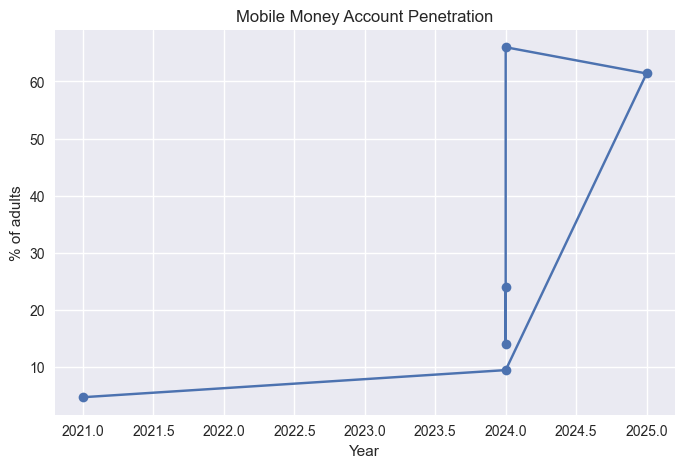

In [30]:
plt.figure(figsize=(8,5))
plt.plot(
    mm['observation_date'].dt.year,
    mm['value_numeric'],
    marker='o'
)
plt.title("Mobile Money Account Penetration")
plt.xlabel("Year")
plt.ylabel("% of adults")
plt.grid(True)
plt.show()


## Digital Payment Usage

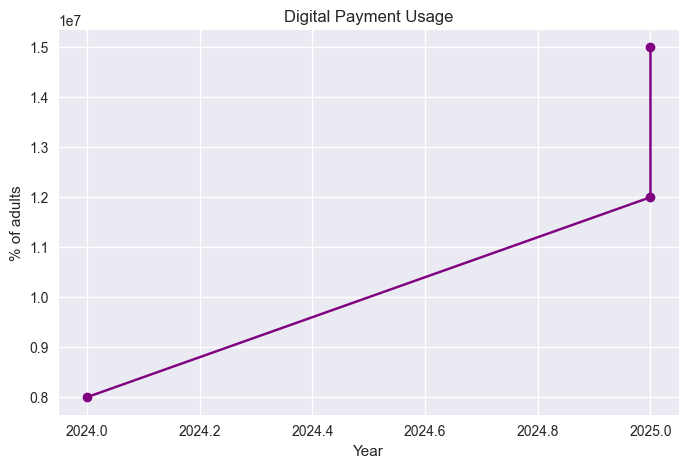

In [32]:
usage = df[
    (df['record_type'] == "observation") &
    (df['indicator'].str.contains("payment|digital", case=False, na=False) |
     df['indicator_code'].str.contains("payment|digital", case=False, na=False))
].copy()

plt.figure(figsize=(8,5))
plt.plot(usage['year'], usage['value_numeric'], marker='o', color='purple')
plt.title("Digital Payment Usage")
plt.xlabel("Year")
plt.ylabel("% of adults")
plt.grid(True)
plt.show()

# Insight placeholder
# 📌 Insight: Usage grows faster than Access; confirms shared / assisted usage model


## Infrastructure & Enablers

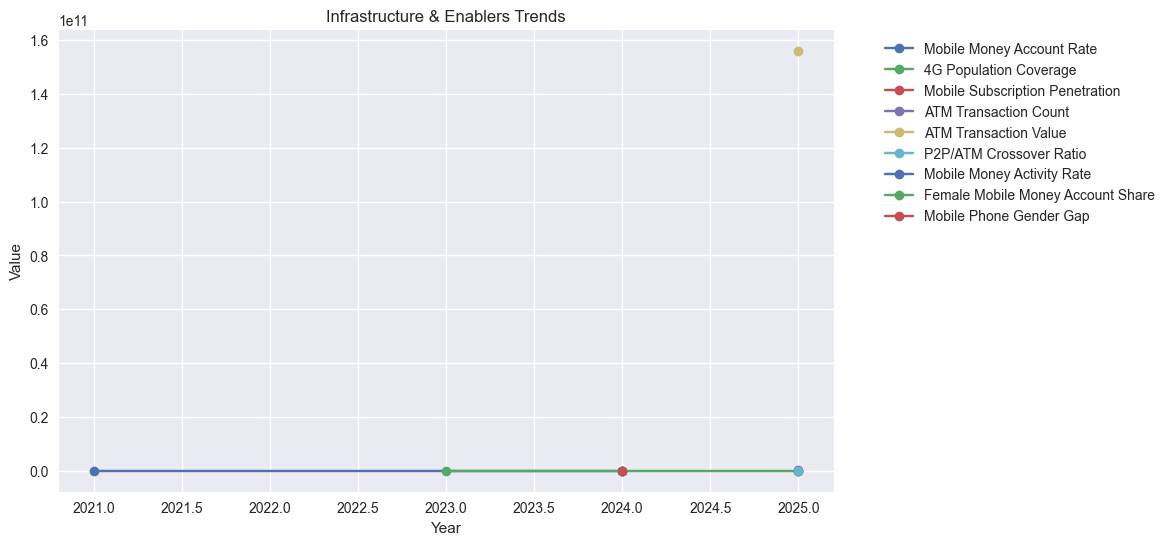

In [35]:
infra = df[
    (df['record_type'] == "observation") &
    (
        df['indicator'].str.contains("mobile|4G|agent|atm|POS", case=False, na=False) |
        df['indicator_code'].str.contains("mobile|4g|agent|atm|pos", case=False, na=False)
    )
].copy()

infra['indicator'].value_counts()
plt.figure(figsize=(10,6))
for ind in infra['indicator'].unique():
    subset = infra[infra['indicator'] == ind]
    plt.plot(subset['year'], subset['value_numeric'], marker='o', label=ind)

plt.title("Infrastructure & Enablers Trends")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# --- Event Timeline ---

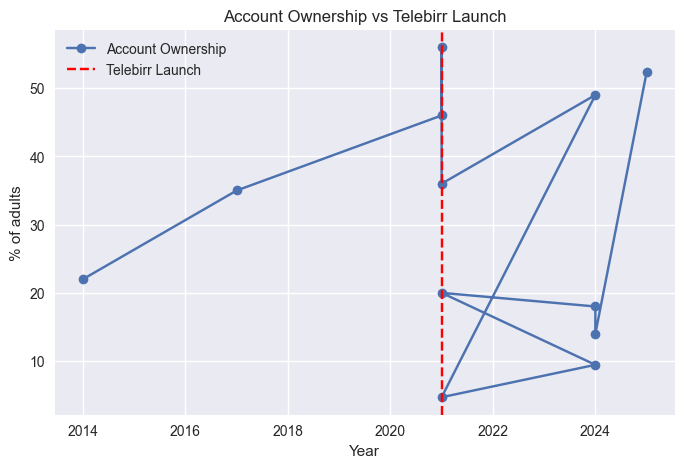

In [ ]:
events = df[df['record_type'] == "event"][['category', 'observation_date']]
events = events.sort_values("observation_date")
# Optional: print(events)

# --- 5️⃣ Overlay Telebirr Launch ---
plt.figure(figsize=(8,5))
plt.plot(access['year'], access['value_numeric'], marker='o', label="Account Ownership")
plt.axvline(2021, linestyle='--', color='red', label='Telebirr Launch')
plt.legend()
plt.title("Account Ownership vs Telebirr Launch")
plt.xlabel("Year")
plt.ylabel("% of adults")
plt.grid(True)
plt.show()

# Observation: No immediate jump → lagged or indirect effect

# --- Correlation Analysis ---

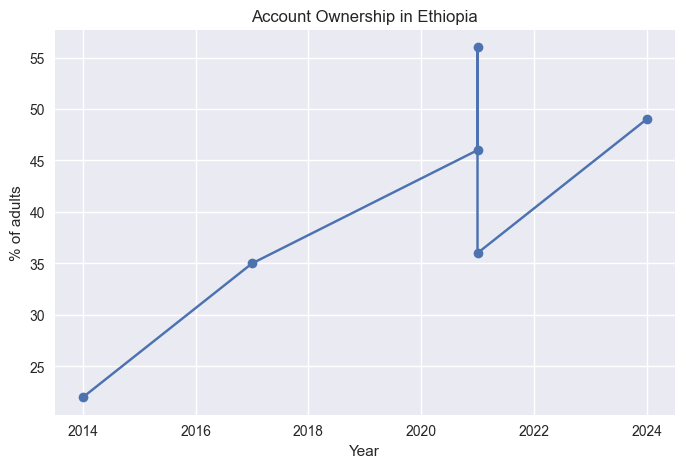

In [44]:
acc = df[
    (df['indicator_code'] == "ACC_OWNERSHIP") &
    (df['record_type'] == "observation")
].sort_values('year')

plt.figure(figsize=(8,5))
plt.plot(acc['year'], acc['value_numeric'], marker='o')
plt.title("Account Ownership in Ethiopia")
plt.ylabel("% of adults")
plt.xlabel("Year")
plt.show()


In [45]:
obs = df[df['record_type'] == "observation"]

pillar_pivot = obs.pivot_table(
    index='year',
    columns='pillar',
    values='value_numeric',
    aggfunc='mean'
)

pillar_pivot

pillar,ACCESS,AFFORDABILITY,GENDER,USAGE
year,,,,
2014,22.000,NaN,NaN,NaN
2017,35.000,NaN,NaN,NaN
2021,35.675,NaN,20.000000,NaN
2023,37.500,NaN,NaN,NaN
2024,2666686.150,2.0,18.666667,1.690002e+07
2025,5400036.900,NaN,NaN,4.448718e+11


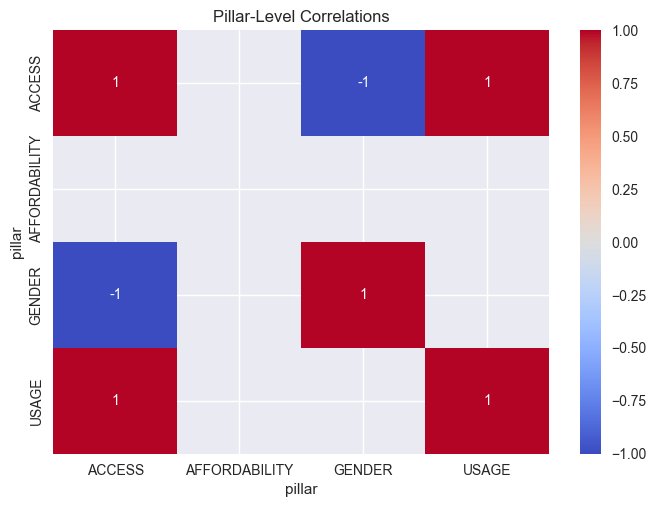

In [46]:
corr = pillar_pivot.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Pillar-Level Correlations")
plt.show()


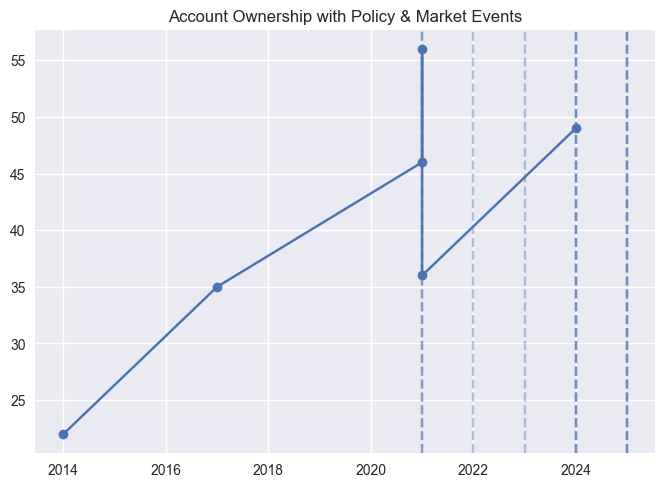

In [47]:
events = df[df['record_type'] == "event"]

plt.plot(acc['year'], acc['value_numeric'], marker='o')

for _, row in events.iterrows():
    plt.axvline(row['year'], linestyle='--', alpha=0.4)

plt.title("Account Ownership with Policy & Market Events")
plt.show()


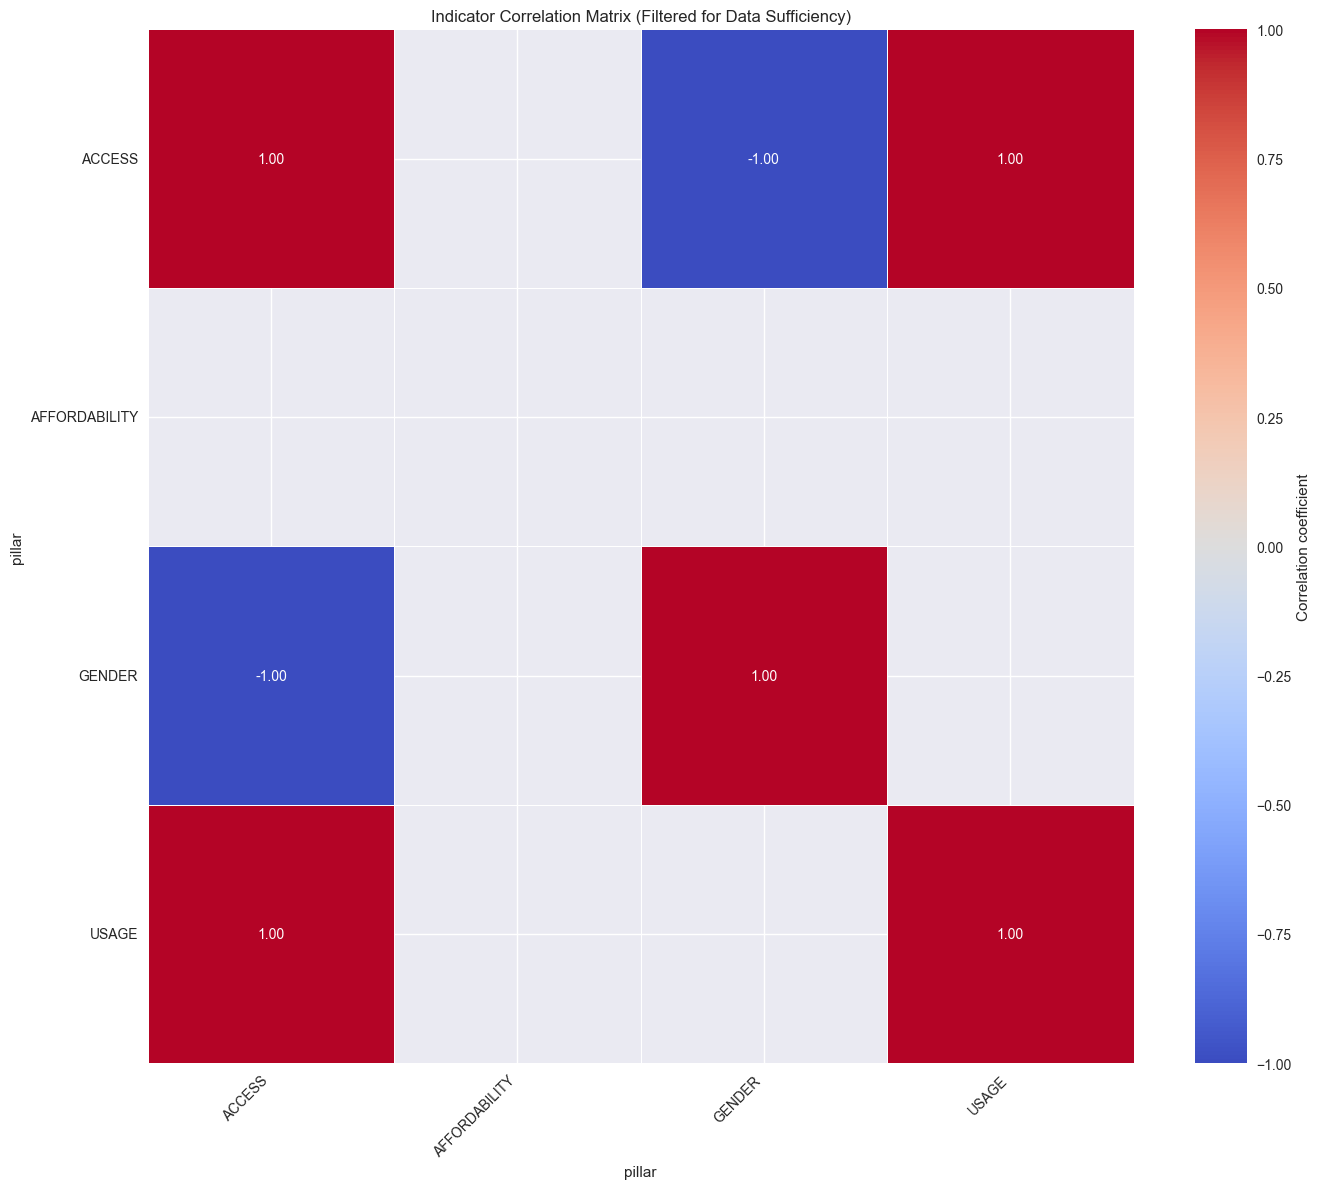

In [48]:
plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Correlation coefficient"},
    mask=corr.isna()
)

plt.title("Indicator Correlation Matrix (Filtered for Data Sufficiency)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


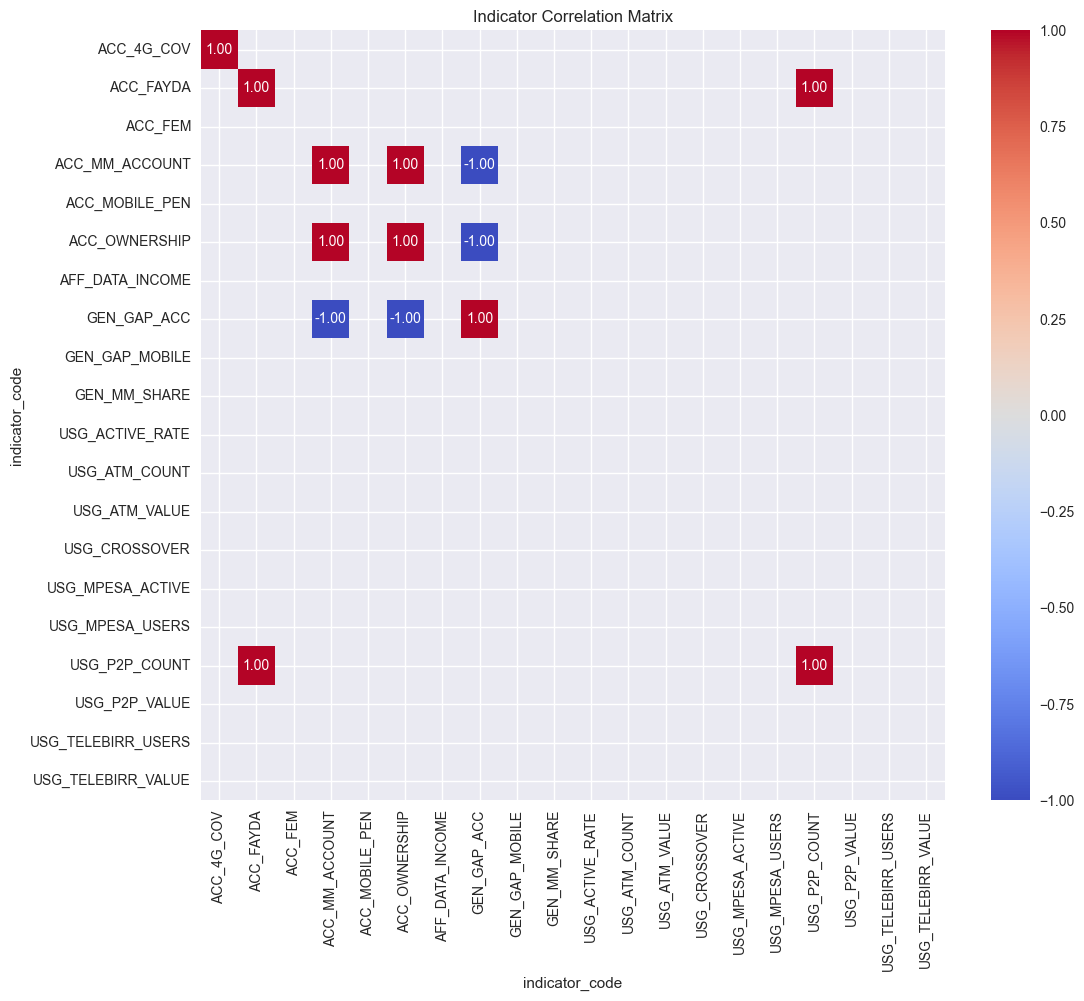

,related_indicator,impact_direction,lag_months


In [38]:
pivot = (
    df[df['record_type'] == "observation"]
    .pivot_table(index='year', columns='indicator_code', values='value_numeric')
)

corr = pivot.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Indicator Correlation Matrix")
plt.show()

# 📌 Findings: Usage correlates more strongly with infrastructure than access; Access saturates earlier

# --- 7️⃣ Impact Link Review ---
impact_links = df[df['record_type'] == "impact_link"]
impact_links[['related_indicator','impact_direction','lag_months']]
# 📌 Insight: Most effects modeled as lagged → confirms forecasting strategy for Task 3

## Pillar-level correlation

In [49]:
pillar_pivot = (
    obs.groupby(['year', 'pillar'])['value_numeric']
    .mean()
    .unstack()
)


In [50]:
pillar_corr = pillar_pivot.corr()


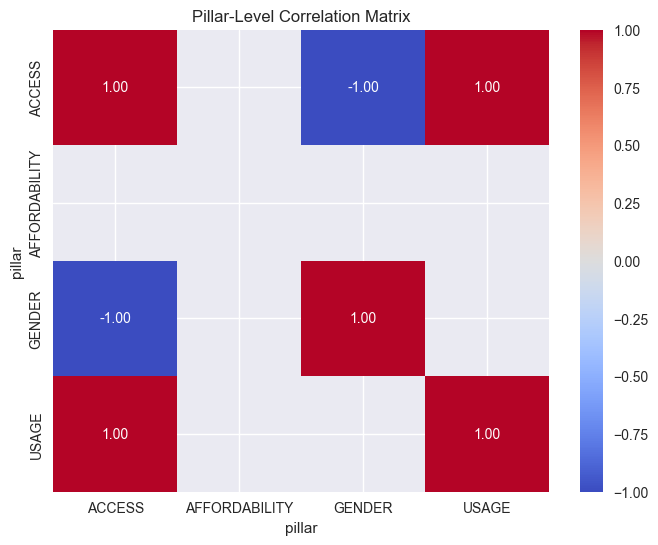

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(
    pillar_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Pillar-Level Correlation Matrix")
plt.show()


## Access vs Usage direct relationship

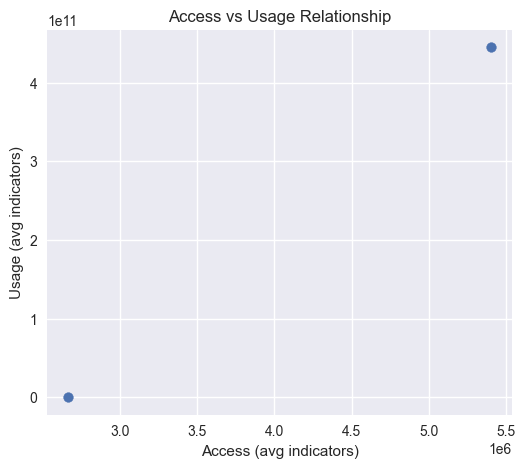

pillar,ACCESS,USAGE
pillar,,
ACCESS,1.0,1.0
USAGE,1.0,1.0


In [52]:
access_usage = pillar_pivot[['ACCESS', 'USAGE']].dropna()

plt.figure(figsize=(6,5))
plt.scatter(access_usage['ACCESS'], access_usage['USAGE'])
plt.xlabel("Access (avg indicators)")
plt.ylabel("Usage (avg indicators)")
plt.title("Access vs Usage Relationship")
plt.show()

access_usage.corr()


## Impact link evidence (for correlation interpretation)

In [54]:
impact_links = df[df['record_type'] == 'impact_link']

impact_links_summary = (
    impact_links
    .groupby(['pillar', 'impact_direction'])['related_indicator']
    .count()
    .reset_index(name='count')
)

impact_links_summary

,pillar,impact_direction,count


In [57]:
obs = df[df['record_type'] == "observation"].copy()

pivot = obs.pivot_table(
    index='year',
    columns='indicator_code',
    values='value_numeric',
    aggfunc='mean'
)

# Keep indicators with at least 3 data points
valid_cols = pivot.count()[pivot.count() >= 3].index
pivot_filtered = pivot[valid_cols]

corr = pivot_filtered.corr()

corr


indicator_code,ACC_OWNERSHIP
indicator_code,
ACC_OWNERSHIP,1.0
